## Unit depth

In [50]:
# auditory-responsive thalamic units
thal_units = {
    1: [0, 18, 44, 69, 86, 129, 174, 198, 199, 230, 302, 365, 381, 452, 463, 477, 536, 576],
    2: [102, 131, 189, 218, 232, 248, 264, 276, 278, 280, 305, 369, 385, 395, 406, 408, 410, 411, 412, 425, 428, 501, 528, 613, 625],
    3: [49, 146, 156, 267, 374, 569, 616, 631],
    4: [9, 10, 30, 57, 76, 79, 92, 93, 109, 172, 211, 294, 295, 298, 434, 460, 546, 548, 561, 572, 587, 588, 599, 621],
}

In [84]:
np.arange(0, 360, 15)

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345])

In [85]:
config = {
    1: [[0, 360], [2690, 3050]],
    2: [[400, 760], [760, 1120], [2000, 2360], [2500, 2860], [3320, 3680], [4050, 4410]],
    3: [[1900, 2260], [2740, 3100]],
    4: [[0, 360], [360, 720], [720, 1080], [1800, 2260], [2600, 2960], [3500, 3860]],
}

In [96]:
session = '013608_ppcSIT_2025-01-22_12-59-00'  # PPC
session = '013608_ppcSIT_2025-01-23_08-46-51'  # HPC
#session = '013608_ppcSIT_2025-01-24_08-19-45'  # Thalamus

animal  = session.split('_')[0]

units_file = os.path.join(source, animal, session, 'units.h5')

positions = {}
with h5py.File(units_file, 'r') as f:
    unit_names = [x for x in f]
with h5py.File(units_file, 'r') as f:
    for unit_name in unit_names:
        positions[unit_name] = np.array(f[unit_name]['anatomical_position'])

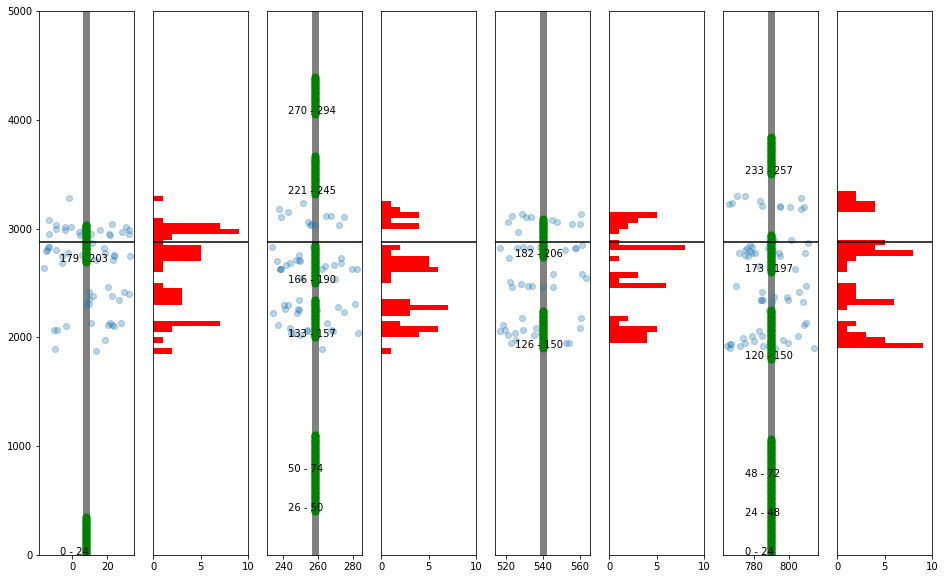

In [98]:
spread = 50
v_max = 5000

fig, axes = plt.subplots(1, 8, figsize=(16, 10))

# probe
x = np.array([8, 258, 540, 790])
y = np.arange(0, 15*640)

for i, x_pos in enumerate(x):
    ids = np.array(thal_units[i+1])
    anat_pos_oth = np.array([pos for unit_id, pos in positions.items() if np.abs(pos[0] - x_pos) < 50])
    anat_pos_sel = np.array([pos for unit_id, pos in positions.items() if np.abs(pos[0] - x_pos) < 50 and \
                             int(unit_id.split('-')[1]) in ids])
    x_pos_oth = np.random.rand(len(anat_pos_oth)) * spread - spread/2
    x_pos_sel = np.random.rand(len(anat_pos_sel)) * spread - spread/2
    
    # probe shank
    axes[2*i].scatter(np.ones(len(y)) * x_pos, y, color='grey')  # probe shank
    axes[2*i].scatter(x_pos_oth + x_pos, anat_pos_oth[:, 1], alpha=0.3, color='tab:blue')
    #axes[2*i].scatter(x_pos_sel + x_pos, anat_pos_sel[:, 1], alpha=0.3, color='red')
    axes[2*i].set_ylim(0, v_max)
    axes[2*i].axhline(15*192, color='black')
    if i > 0:
        axes[2*i].set_yticks([])
    
    for band in config[i+1]:
        y_band = np.arange(band[0], band[1], 15)
        axes[2*i].scatter(np.ones(len(y_band)) * x_pos, y_band, s=50, color='green') 
        axes[2*i].text(x_pos - 15, band[0], '%d - %d' % (band[0]/15, band[1]/15))
    
    
    # unit density
    axes[2*i+1].hist(anat_pos_oth[:, 1], bins=np.arange(0, v_max, 50), color='red', orientation="horizontal")
    axes[2*i+1].set_xlim(0, 10)
    axes[2*i+1].set_ylim(0, v_max)
    axes[2*i+1].axhline(15*192, color='black')
    axes[2*i+1].set_yticks([])